In [1]:
import torch 
import numpy as np 
import h5py
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
image_names=['gogo', 'saintjohn', 'dionisios', 'fanourios', 'odigitria', 'minos']
PATH = '/home/igeor/MSC-THESIS/data/h5'

image_filenames = [PATH + '/spec/' + x + '.hdf5' for x in image_names]
image_filenames

['/home/igeor/MSC-THESIS/data/h5/spec/gogo.hdf5',
 '/home/igeor/MSC-THESIS/data/h5/spec/saintjohn.hdf5',
 '/home/igeor/MSC-THESIS/data/h5/spec/dionisios.hdf5',
 '/home/igeor/MSC-THESIS/data/h5/spec/fanourios.hdf5',
 '/home/igeor/MSC-THESIS/data/h5/spec/odigitria.hdf5',
 '/home/igeor/MSC-THESIS/data/h5/spec/minos.hdf5']

In [13]:
X = []
for image_filename in image_filenames:
    f = h5py.File(image_filename, 'r')
    spec_image = f['Experiments/__unnamed__/data'][()] # numpy.ndarray 
    f.close()
    spec_image = spec_image.reshape( spec_image.shape[0]*spec_image.shape[1], spec_image.shape[2] )
    X += [ spectrum for spectrum in spec_image ] 
    
X = np.array(X)
X.shape

(805612, 4096)

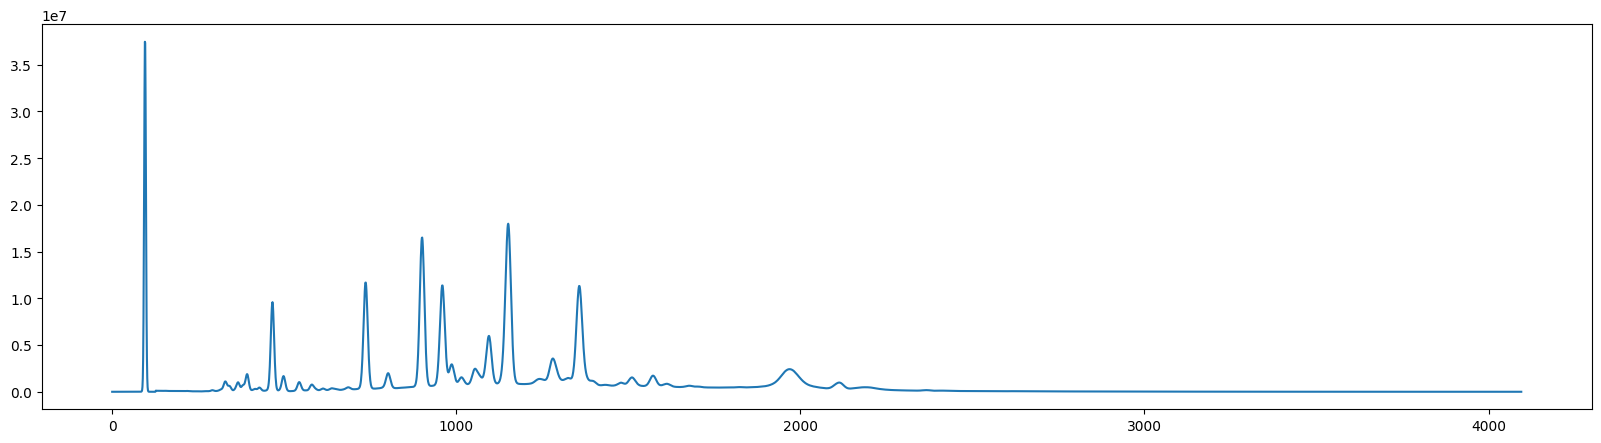

In [62]:
fig = plt.figure(figsize=(20, 5))
plt.plot(X.sum(axis=0))

In [45]:
variances = np.var(X, axis=0)

In [64]:
np.min(variances), np.median(variances), np.mean(variances), np.std(variances), np.max(variances)

(0.0,
 0.16953688398416153,
 24.044363522851274,
 181.2431346191946,
 3557.0434251545175)

<Figure size 2000x500 with 0 Axes>

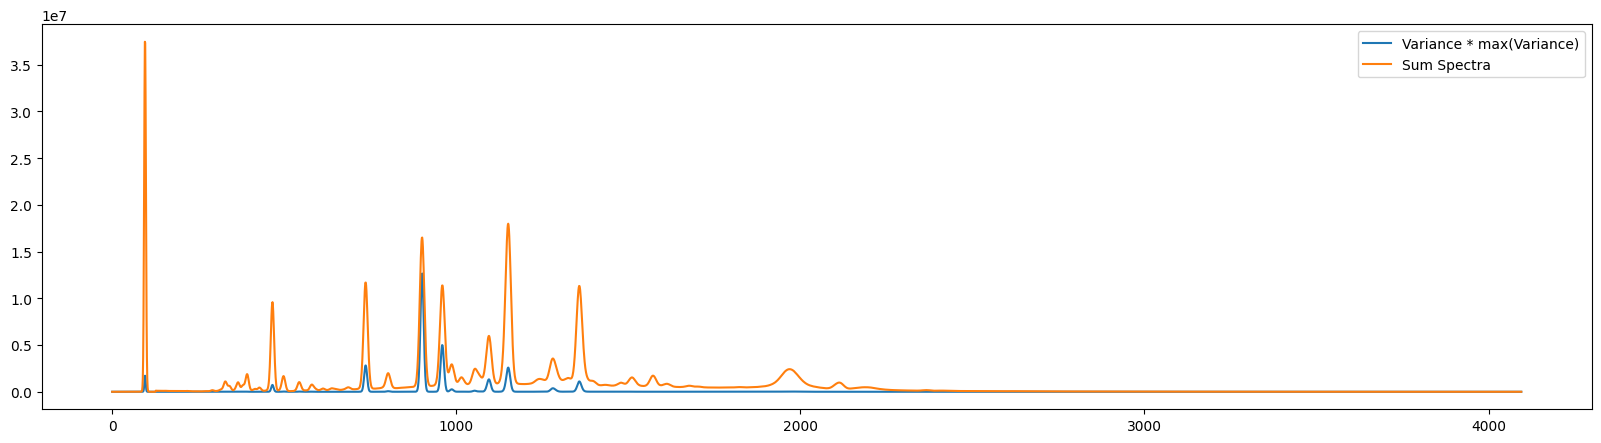

In [75]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(variances * np.max(variances), label='Variance * max(Variance)')
ax.plot(X.sum(axis=0), label='Sum Spectra')
ax.legend()
plt.show()

(805612, 4096) (805612, 452)


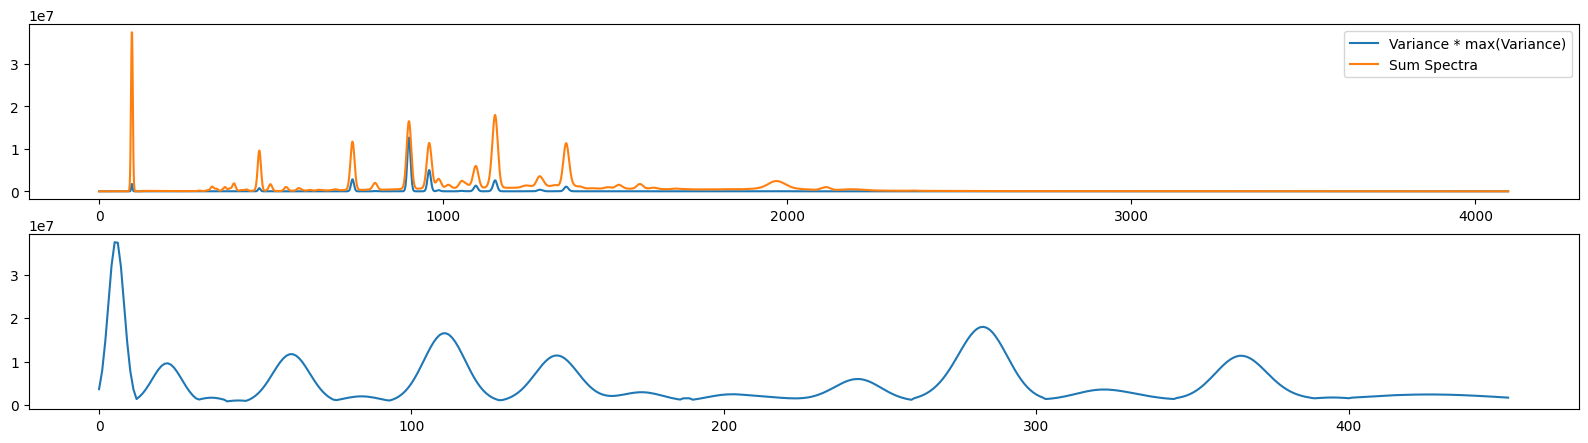

In [84]:
## HOW TO SELECT IT?
keep_cols = variances >= np.mean(variances) - 20    # create boolean mask of columns to keep
## ?????????????????


X_filtered = X[:, keep_cols]      # filter X to keep only selected columns
print(X.shape, X_filtered.shape)

fig, ax = plt.subplots(2, 1, figsize=(20, 5))
ax[0].plot(variances * np.max(variances), label='Variance * max(Variance)')
ax[0].plot(X.sum(axis=0), label='Sum Spectra')
ax[0].legend()
ax[1].plot(X_filtered.sum(axis=0), label='Sum Filtered Spectra')
plt.show()
